# Install Dependencies

In [7]:
#pip install opencv-python 

In [8]:
#pip install glob2

In [9]:
#pip install numpy

In [10]:
#pip install matplotlib

In [11]:
#pip install pandas

# Import Packages

In [14]:
#will put all the imported packages here in final stage of the project

# Import Logging

In [15]:
import logging

In [16]:
logging.basicConfig(filename ='important.log',level= logging.INFO,format='%(asctime)s:%(message)s')

# AWS Tesseract 

In [17]:
# code for obtain xmin,xmax,ymin,ymax

In [18]:
xmin_lst = []
xmax_lst = []
ymin_lst = []
ymax_lst = []

In [19]:
#Test purpose config values are xmin=0 ymin=0 ymax=20 xmax=10
#set config falues here

xmax=10
ymax=20
ymin=0
xmin=0

> # Count number of files in a Directory
- Below code snippet has been used to count the number of **.jpg** and **.png** files in given directory.<br> 
- Obtain the total of both sum of **.jpg** and sum of **.png** files assing it to the file_count variable.

In [20]:
import os
import fnmatch

DIR = 'Dataset_in/'
#count number of .jpg files
jpg_count = len([name for name in os.listdir(DIR) if fnmatch.fnmatch(name, '*.jpg')]) 

#count number of .png files
png_count = len([name for name in os.listdir(DIR) if fnmatch.fnmatch(name, '*.png')])

file_count = jpg_count + png_count
print(file_count)
logging.info('Directory has {} jpg files stored.'.format(file_count))

28


># Crop Graph Area
>Extract graph area from a given image. in here used counters and draw bounding boxes and get the bounding box with maximum area.width of the bounding box is **x range (xmax - xmin)** and height is **y range (ymax - ymin)** <br>
<br>
>> #### After Croping Graph Area
![](./temp1/1.jpg)

In [21]:
import numpy as np
import cv2

#check whether folder dir exists if not create dir
src = "Dataset_in/" 
if not os.path.exists(src): 
    os.makedirs(src)
    logging.info(src +'has created')
    
temp ="temp1/"
if not os.path.exists(temp):
    os.makedirs(temp)
    logging.info(temp +'has created')

def cropmethod(path):
    im = cv2.imread(src+path)
    #invert image
    im = cv2.bitwise_not(im)
    #gray scale the image
    gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    #take counter areas of all counters 
    ret,thresh = cv2.threshold(gray,120,255,0)
    contours,_ = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    areas = [cv2.contourArea(c) for c in contours]
    #take maximum counter area and draw a bounding box
    max_index = np.argmax(areas)
    cnt=contours[max_index]
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),2)

    #crop image
    crop = im[y:y+h,x:x+w]
    #cv2.imwrite("img5_rect1.jpg", crop) #test stage
    crop = cv2.bitwise_not(crop)
    gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
    #ret, gray = cv2.threshold(gray, thresh=210, maxval=255, type=cv2.THRESH_BINARY)
    return gray


In [22]:
#make logs for the crop method task
for i in range(1,file_count+1):
    if os.path.exists(temp + "{}.jpg".format(i)):
        logging.info(temp +'{}.jpg has already exists (overwrite).'.format(i))
        cv2.imwrite(temp + "{}.jpg".format(i), cropmethod("{}.jpg".format(i)))
    else:
        cv2.imwrite(temp + "{}.jpg".format(i), cropmethod("{}.jpg".format(i)))
        logging.info(temp +'{}.jpg has saved.'.format(i))

># Remove Grid
> - This is all about **Removing grid lines** (Horizontal and vertical lines) of the graph area.
> - What here done is **Gray scaled** entire image.The output will be a B/W image.
> - Then **identify horizontal and vertical lines** and replace them with white colour (255). 
> - Then grid lines will be automatically removed.
<br><br>
>>- #### Before removing grid 
    ![](./temp1/1.jpg)<br>
>>- #### After removing Grid
    ![](./temp2/1.jpg)


In [23]:
import numpy as np
import sys
import cv2

src = "temp1/"
if not os.path.exists(src):
    os.makedirs(src)
    logging.info(src +'has created')
    
out ="temp2/"
if not os.path.exists(out):
    os.makedirs(out)
    logging.info(out +'has created')

def removegrid(path):
    img = cv2.imread(src + path, cv2.IMREAD_COLOR)
    # check whether image is b/w if it isn't b/w convert it in to b/w image
    if len(img.shape) != 2:
        gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray1 = img
    gray = cv2.bitwise_not(gray1)
    bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                                cv2.THRESH_BINARY, 15, -2)
    # make 2 copies of inverted b/w image
    horizontal = np.copy(bw)
    vertical = np.copy(bw)
    
    # Specify size on horizontal axis
    cols = horizontal.shape[1]
    horizontal_size = cols // 30
    # Create structure element for extracting horizontal lines through morphology operations
    horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
    # Apply morphology operations
    horizontal = cv2.erode(horizontal, horizontalStructure)
    horizontal = cv2.dilate(horizontal, horizontalStructure)
    
    # Specify size on vertical axis
    rows = vertical.shape[0]
    verticalsize = rows // 30
    # Create structure element for extracting vertical lines through morphology operations
    verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, verticalsize))
    # Apply morphology operations
    vertical = cv2.erode(vertical, verticalStructure)
    vertical = cv2.dilate(vertical, verticalStructure)
    
    # Inverse vertical image
    vertical = cv2.bitwise_not(vertical)
    horizontal = cv2.bitwise_not(horizontal)
    
    # replace black area with the white colour
    img_new = gray1.copy()
    img_new[horizontal == 0] = 255
    
    img_final = img_new.copy()
    img_new[vertical == 0] = 255
    
    img_gauss = cv2.GaussianBlur(img_new, ksize=(3,3), sigmaX=10)
    ret, img_gauss_th = cv2.threshold(img_gauss, thresh=210, maxval=255, type=cv2.THRESH_BINARY)
    
    return img_gauss_th

In [24]:
for i in range(1,file_count+1):
    if os.path.exists(out + "{}.jpg".format(i)):
        logging.info(out +'{}.jpg has already exists (overwrite).'.format(i))
        cv2.imwrite(out + "{}.jpg".format(i), removegrid("{}.jpg".format(i)))
    else:
        cv2.imwrite(out + "{}.jpg".format(i), removegrid("{}.jpg".format(i)))
        logging.info(out +'{}.jpg has saved.'.format(i))

># Extract only the curve 
>
>This code snippet used for obtain only curve. This is doing by drawing bounding boxes  around all the black parts in >image and take the bounding box which covers maximum maximum area.  
>>- #### Before Obtain curve area 
    ![](./temp2/1.jpg)<br>
>>- #### After Obtain curve area 
    ![](./temp3/1.jpg)


In [25]:
import cv2
import numpy as np

src = "temp2/"
if not os.path.exists(src):
    os.makedirs(src)
    logging.info(src +'has created')
    
final = "temp3/"
if not os.path.exists(final):
    os.makedirs(final)
    logging.info(final +'has created')

def extractGraph(path):
    
    image = cv2.imread(src + path)
    #create white background 
    white_bg = 255*np.ones_like(image)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (7,7), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    dilate = cv2.dilate(thresh, kernel, iterations=4)

    cnts = cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    height = 0
    width = 0
    area = 0
    
    #get the maximum area coverd bounding box
    for c in cnts:  
        x,y,w,h = cv2.boundingRect(c)
        if w*h > area:
            area =w*h
            width = w-4
            height = h
            X_cor = x+4
            Y_cor = y

    print("Area ={} max rect width ={}  max rect height ={} x={} Y={}".format(area,width,height,X_cor,Y_cor))
    cv2.rectangle(image, (X_cor, Y_cor), (X_cor + width, Y_cor + height), (36,255,12), 2)
    roi = image[Y_cor:Y_cor + height, X_cor:X_cor + width]
    white_bg[Y_cor:Y_cor + height, X_cor:X_cor + width] = roi
    
    return white_bg


In [26]:
for i in range(1,file_count+1):
    if os.path.exists(final + "{}.jpg".format(i)):
        logging.info(final +'{}.jpg has already exists (overwrite).'.format(i))
        cv2.imwrite(final + "{}.jpg".format(i), extractGraph("{}.jpg".format(i)))
    else:
        cv2.imwrite(final + "{}.jpg".format(i), extractGraph("{}.jpg".format(i)))
        logging.info(final +'{}.jpg has saved.'.format(i))

Area =67608 max rect width =622  max rect height =108 x=42 Y=0
Area =2673 max rect width =239  max rect height =11 x=202 Y=159
Area =507 max rect width =35  max rect height =13 x=219 Y=136
Area =199230 max rect width =866  max rect height =229 x=4 Y=39
Area =218943 max rect width =897  max rect height =243 x=4 Y=33
Area =51300 max rect width =471  max rect height =108 x=123 Y=0
Area =118856 max rect width =660  max rect height =179 x=4 Y=0
Area =201376 max rect width =864  max rect height =232 x=4 Y=38
Area =212636 max rect width =897  max rect height =236 x=4 Y=33
Area =24495 max rect width =351  max rect height =69 x=4 Y=32
Area =46359 max rect width =299  max rect height =153 x=4 Y=0
Area =53738 max rect width =273  max rect height =194 x=4 Y=0
Area =32132 max rect width =273  max rect height =116 x=14 Y=25
Area =12208 max rect width =105  max rect height =112 x=4 Y=0
Area =64565 max rect width =345  max rect height =185 x=9 Y=188
Area =1831536 max rect width =2840  max rect height 

># Remove noise from figures
> After obtaining curve covered bounding box there may be still some noise inside that bounding box. Obtain more accurate results those noise must removed from image. Following code snippet used for remove those noise.


In [27]:
import cv2
import numpy as np

src = "temp3/"
if not os.path.exists(src):
    os.makedirs(src)
    logging.info(src +'has created')
    
final = "Dataset_out/"
if not os.path.exists(final):
    os.makedirs(final)
    logging.info(final +'has created')

def removeNoise(path):

    img = cv2.imread(src + path, 0)
    _, blackAndWhite = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)

    nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(blackAndWhite, None, None, None, 8, cv2.CV_32S)
    sizes = stats[1:, -1] #get CC_STAT_AREA component
    img2 = np.zeros((labels.shape), np.uint8)

    for i in range(0, nlabels - 1):
        if sizes[i] >= 40:   #filter small dotted regions
            img2[labels == i + 1] = 255

    res = cv2.bitwise_not(img2)
    
    return res

In [28]:
for i in range(1,file_count+1):
    if os.path.exists(final + "{}.jpg".format(i)):
        logging.info(final +'{}.jpg has already exists (overwrite).'.format(i))
        cv2.imwrite(final + "{}.jpg".format(i), removeNoise("{}.jpg".format(i)))
    else:
        cv2.imwrite(final + "{}.jpg".format(i), removeNoise("{}.jpg".format(i)))
        logging.info(final +'{}.jpg has saved.'.format(i))

># Graph Extractor 
This is an open source predefiend package and it was modified in here according to the task.

Import:

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import cv2

%matplotlib inline
from graph_extract import Graph

src = "Dataset_out/"
if not os.path.exists(src):
    os.makedirs(src)
    logging.info(src +'has created')
    
src_graph = "tempGraph/"
if not os.path.exists(src_graph):
    os.makedirs(src_graph)
    logging.info(src_graph +'has created')
    
final = "Final/"
if not os.path.exists(final):
    os.makedirs(final)
    logging.info(final +'has created')

def graphExtractor(path,xmin,xmax,ymin,ymax):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4), sharey=True, dpi=120)
    x = (xmin, xmax)
    y = (ymax, ymin)
    image_1 = cv2.imread(src + path)
    resized_image = cv2.resize(image_1, (556, 1494)) 
    cv2.imwrite(src_graph + path , resized_image)
    g = Graph(src_graph + path, xlim=x, ylim=y)
    g.name
    g.show_img()
    
    data = g.data.to_frame()
    data = data[data[g.name] < ymax]
    data['index'] = data.index
    data = data.reset_index()
    data = data.drop(columns=["level_0"])
    
    plt.plot(data['index'] ,data[g.name])
    ax1.plot(data['index'] ,data[g.name])
    ax1.set_title(path)
    plt.savefig(final + path, dpi=1200)
    
    return data  

C:\Users\Kasun.A\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


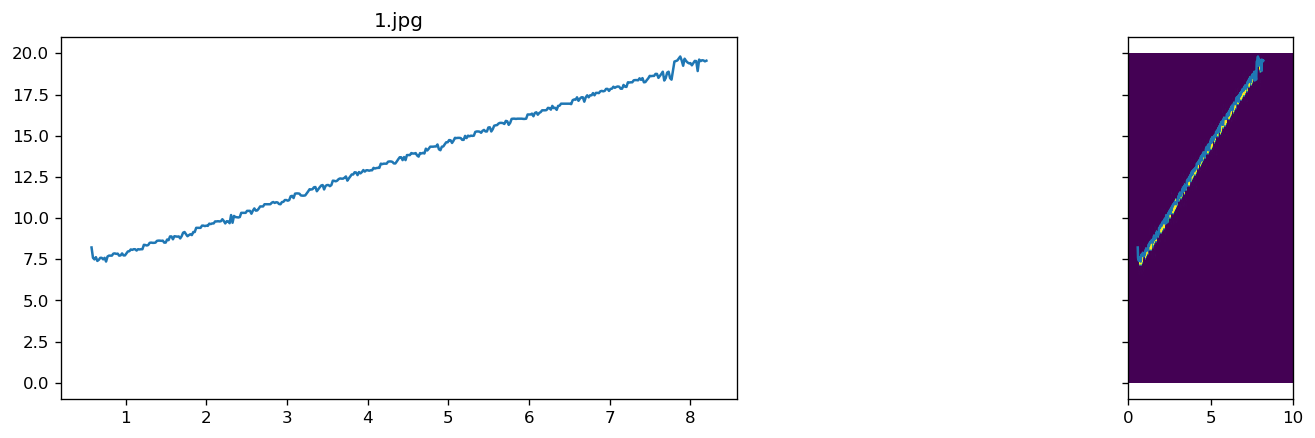

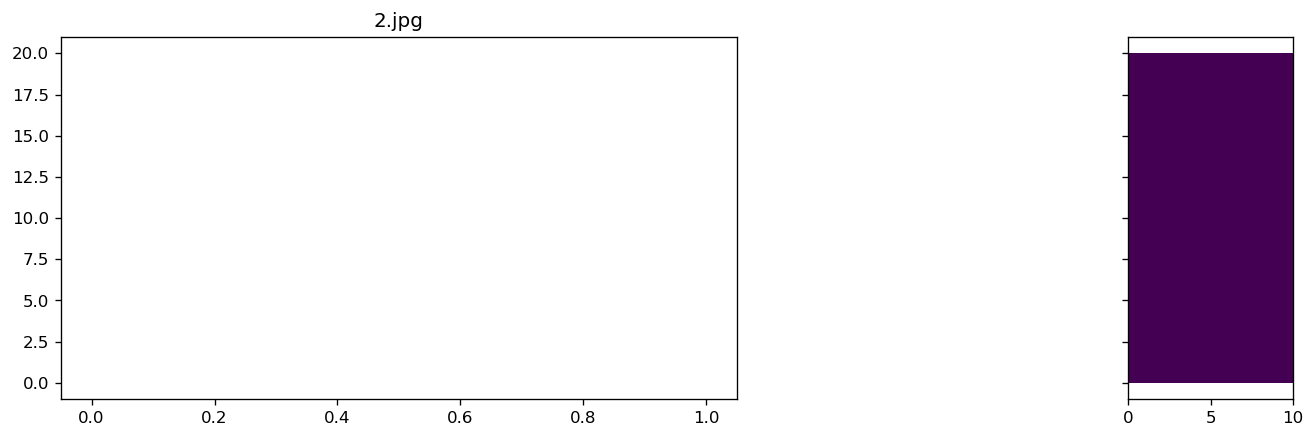

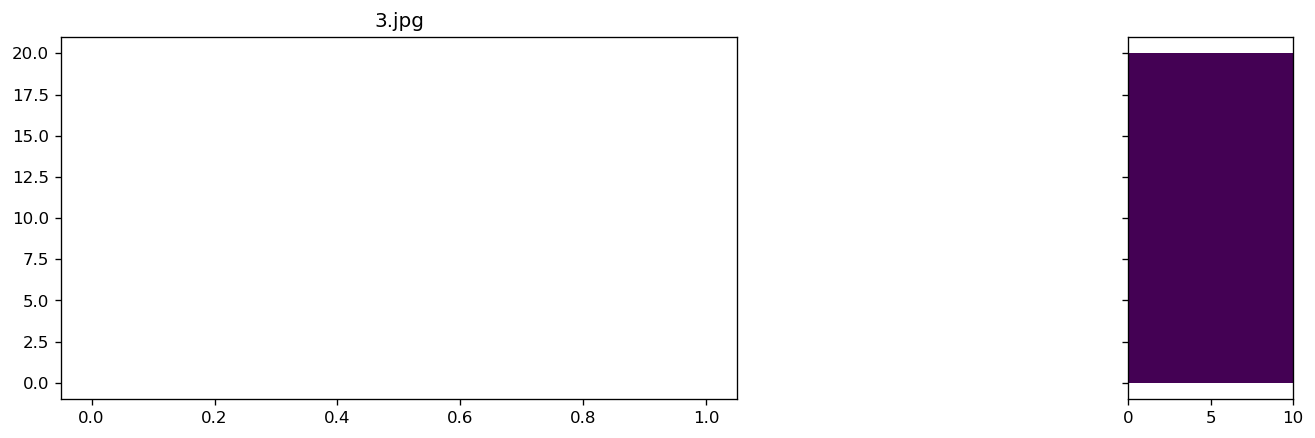

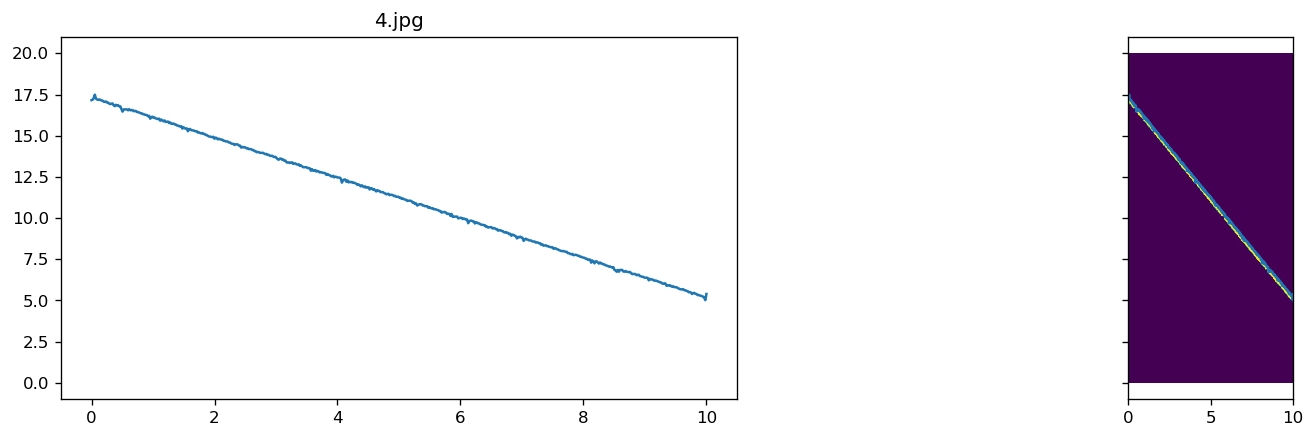

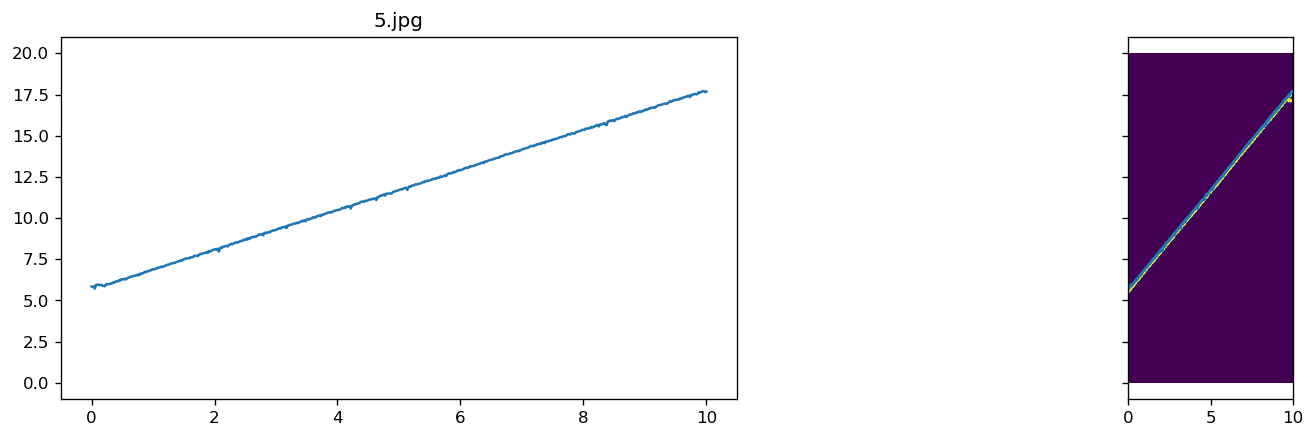

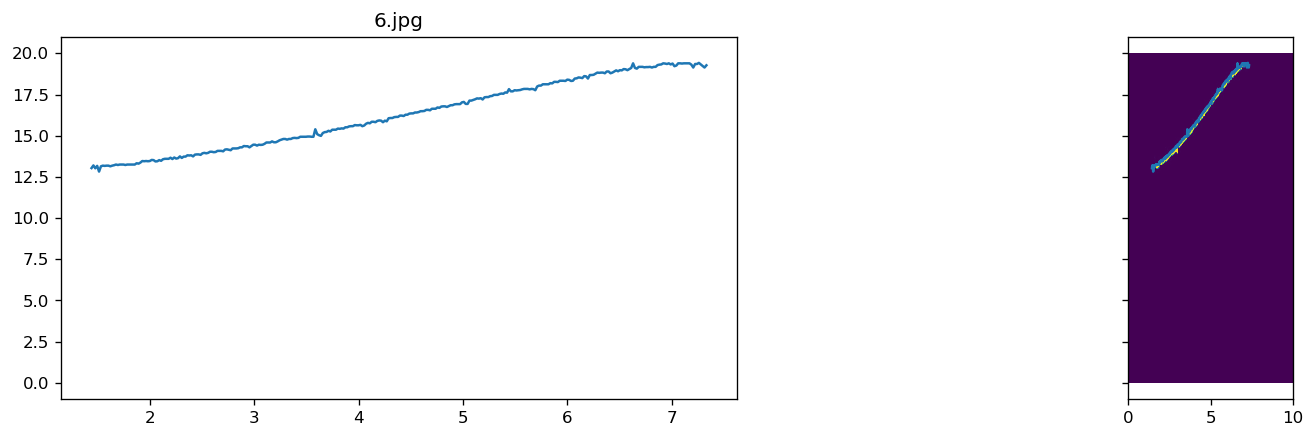

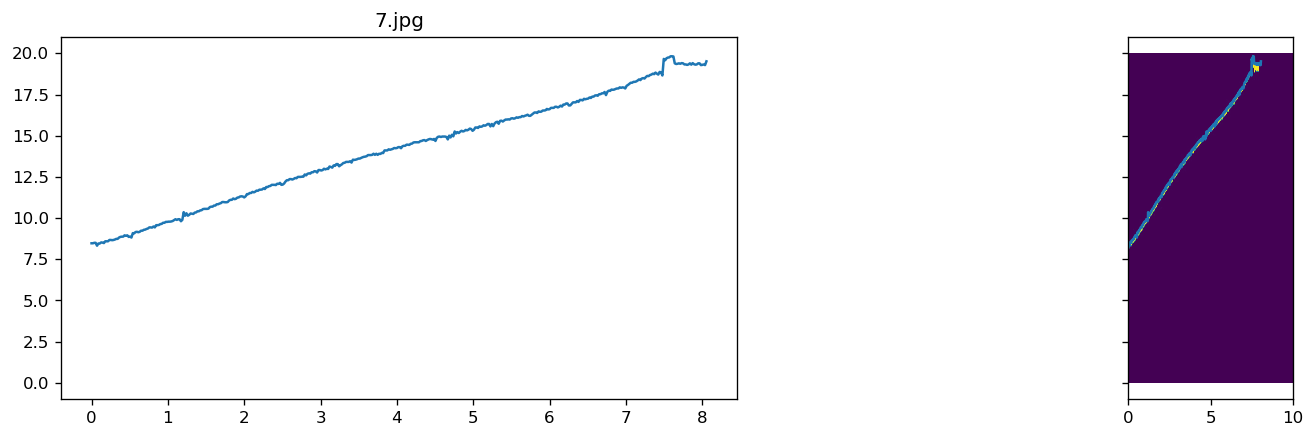

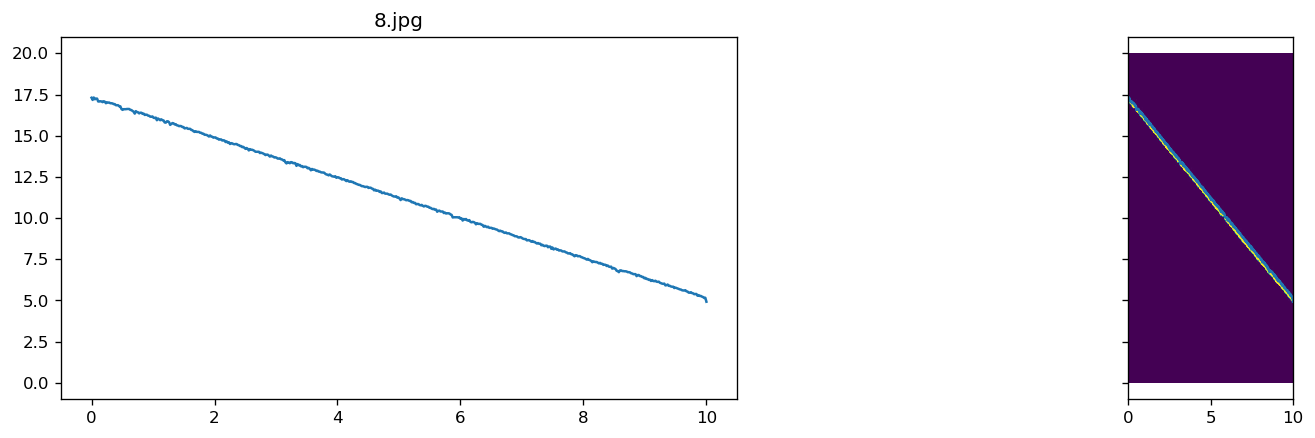

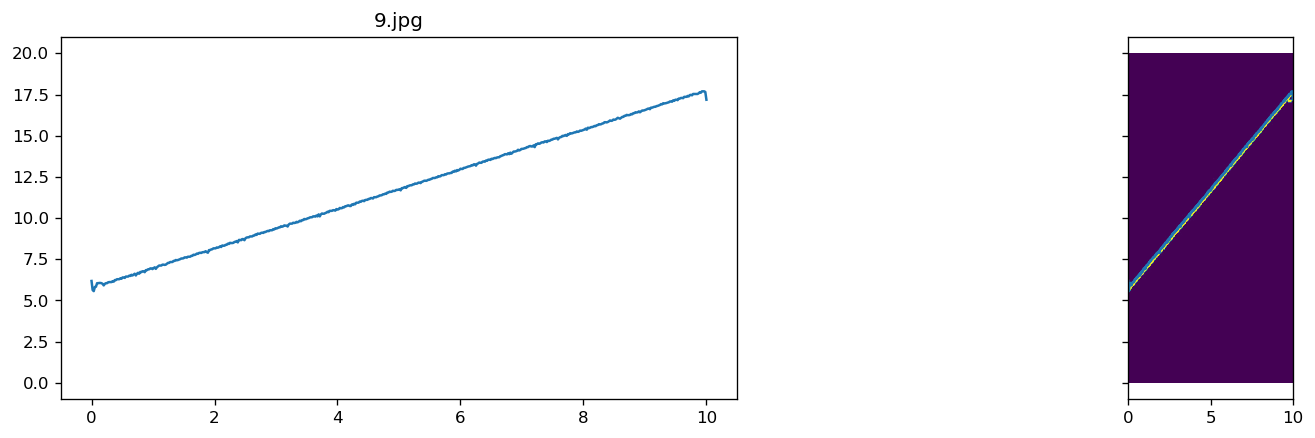

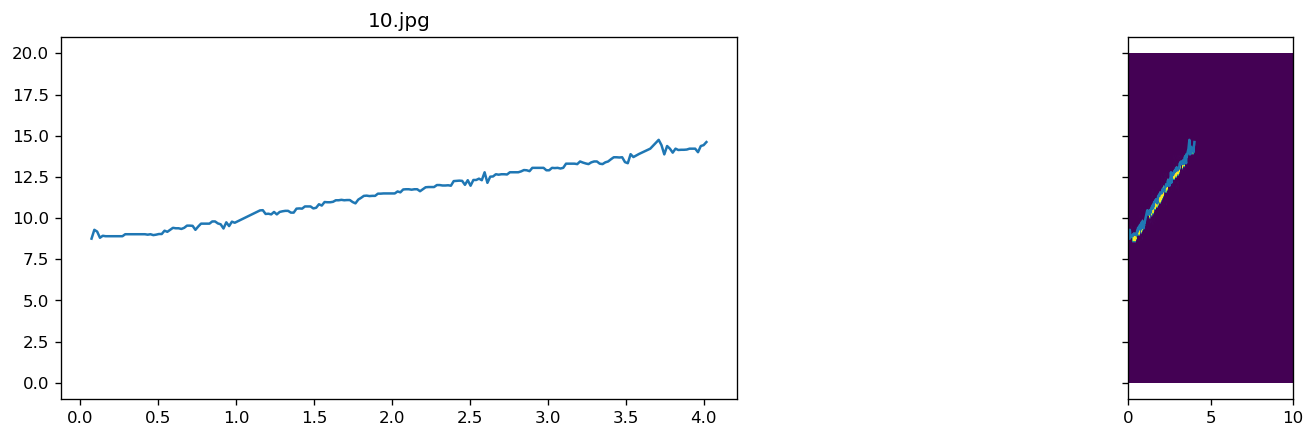

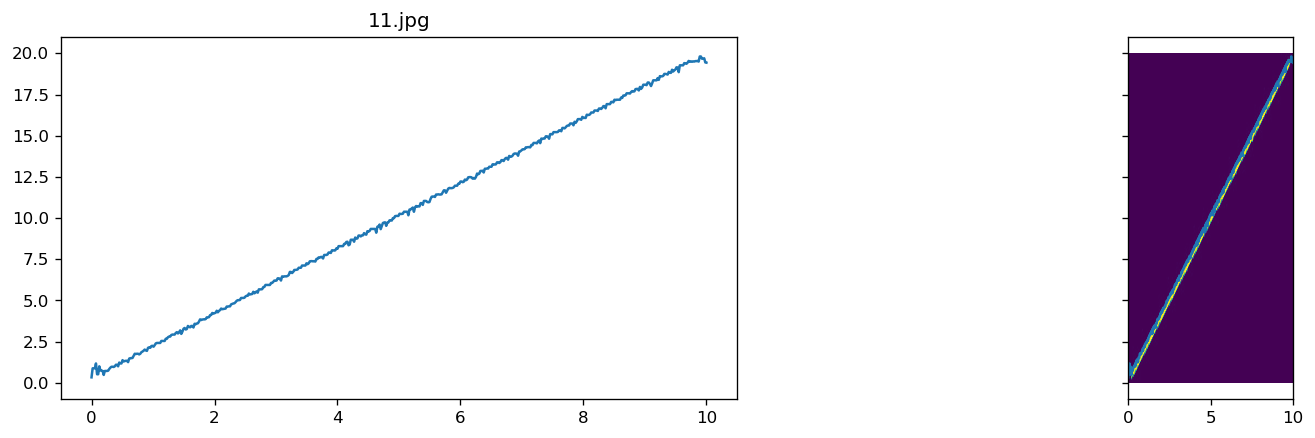

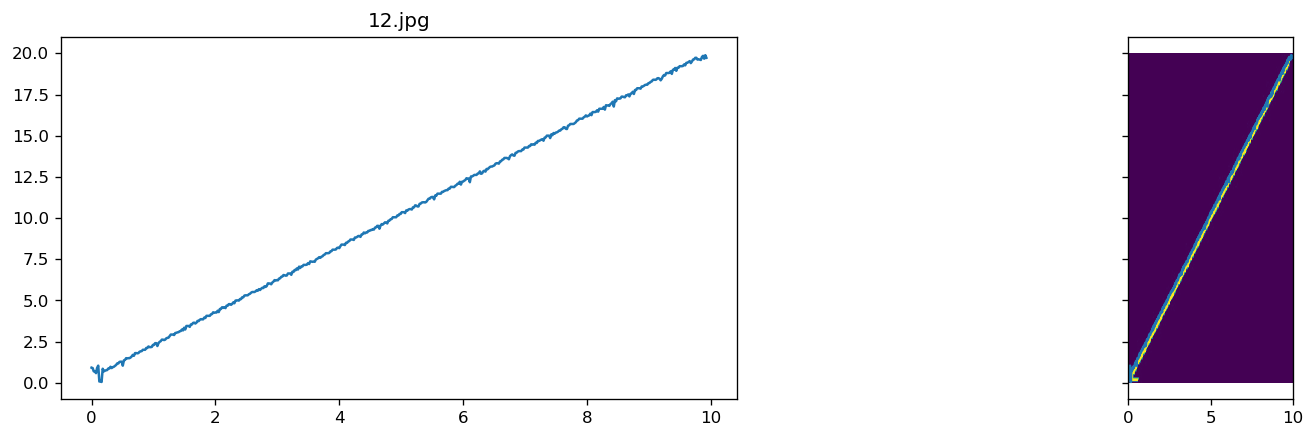

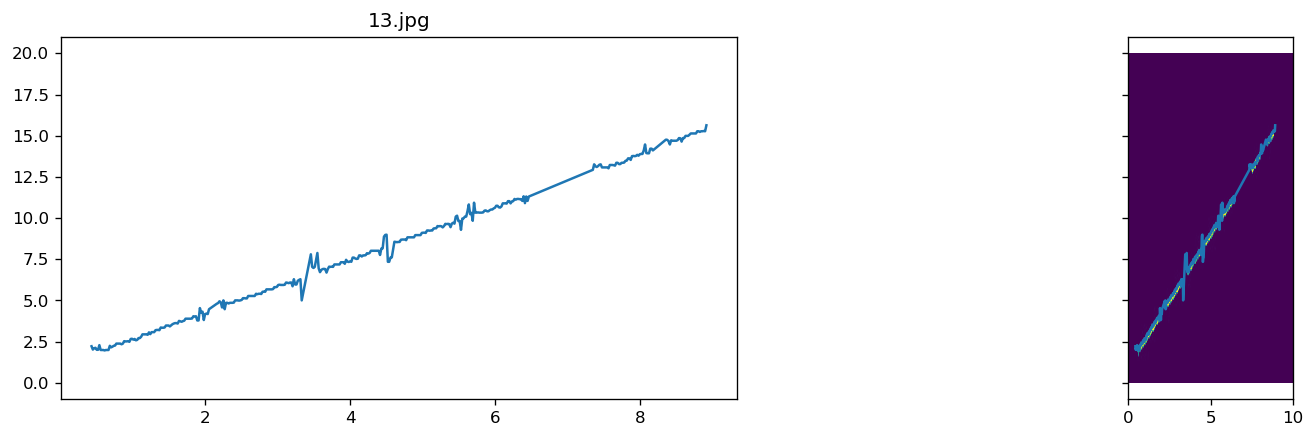

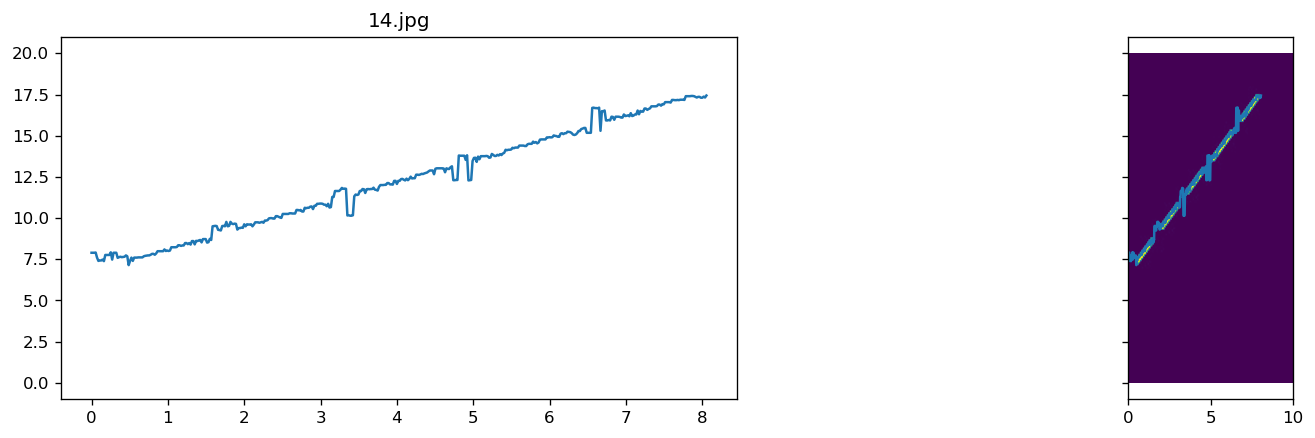

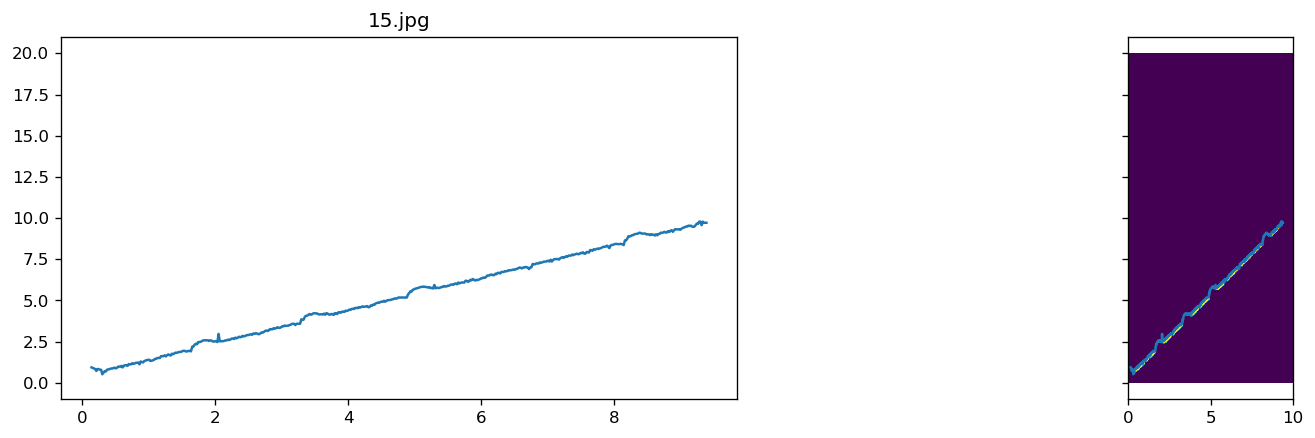

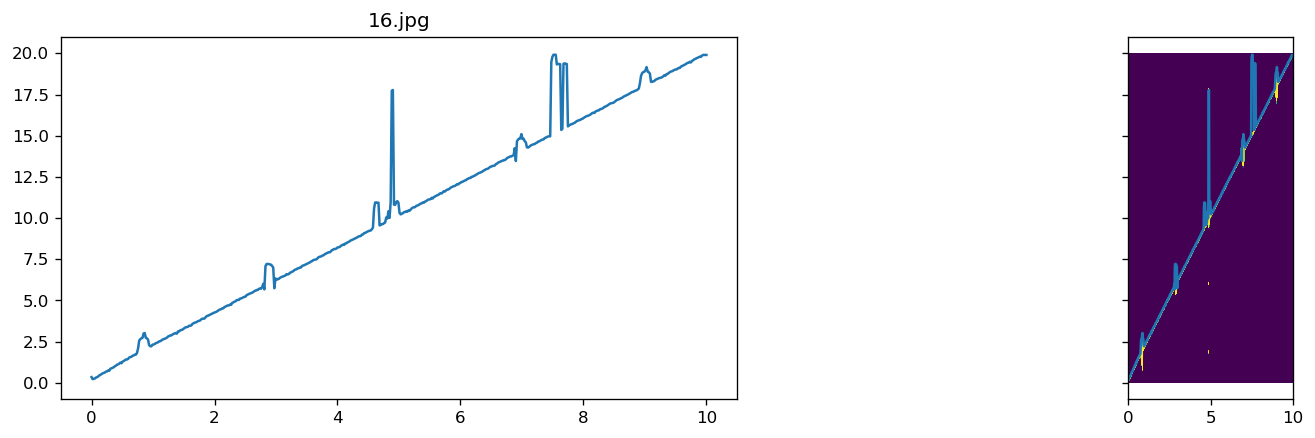

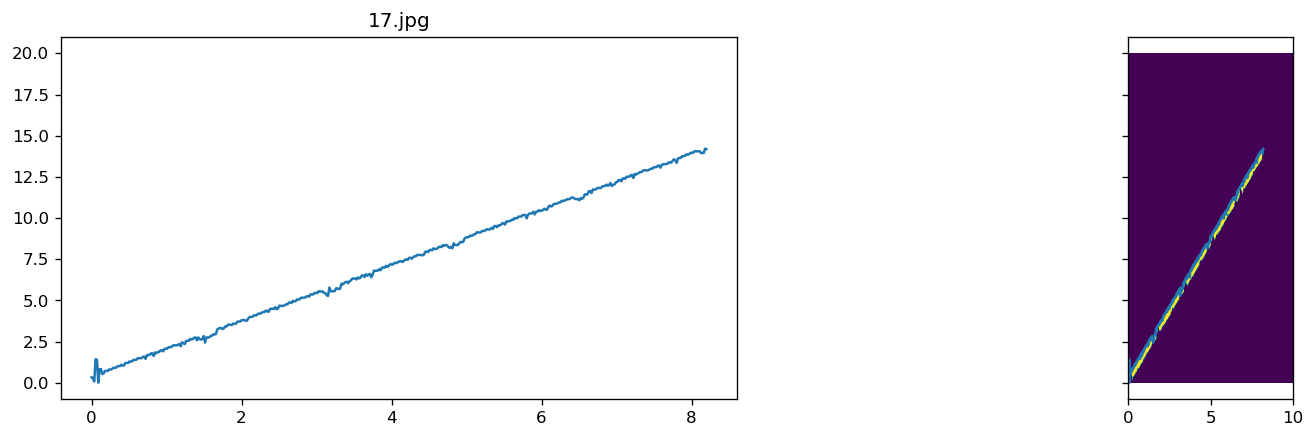

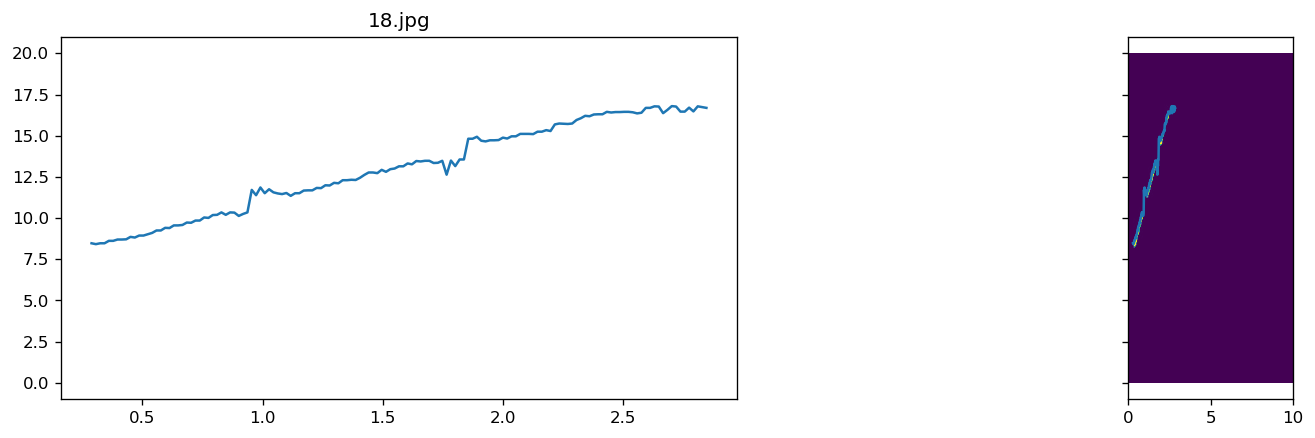

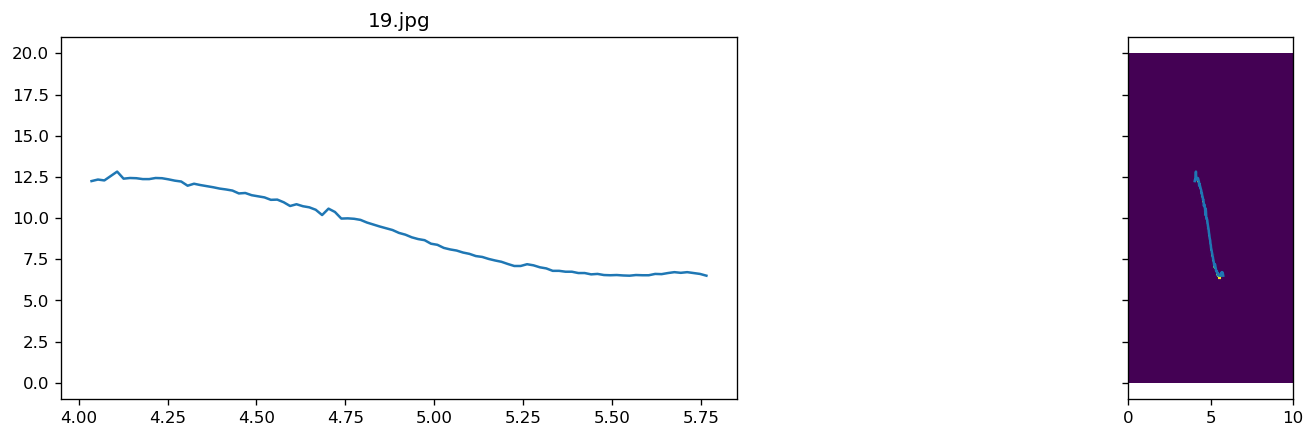

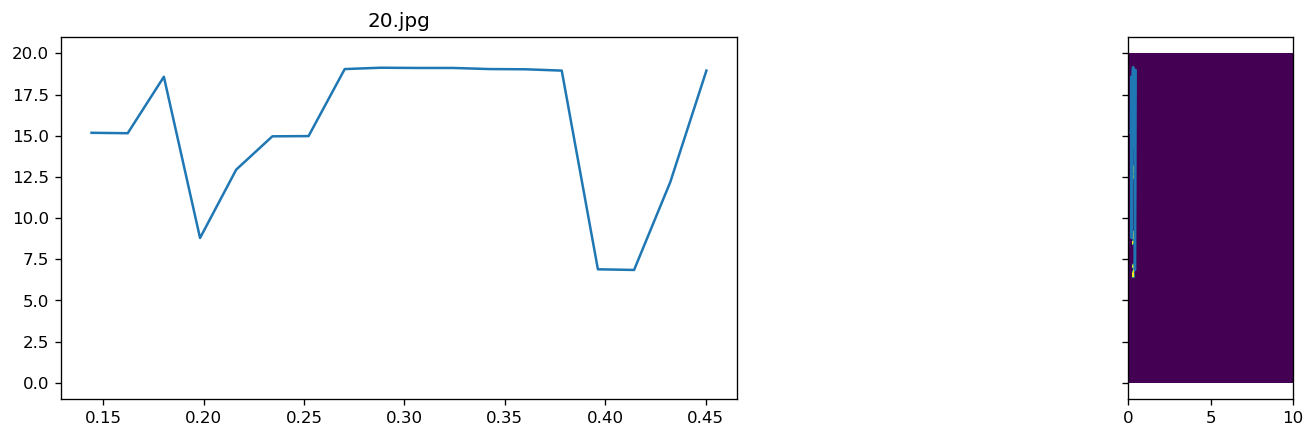

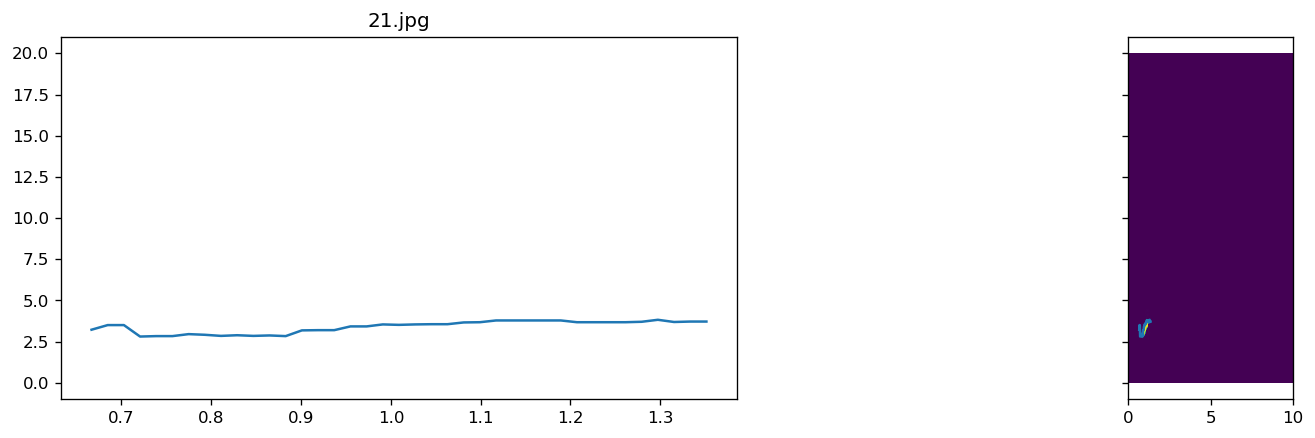

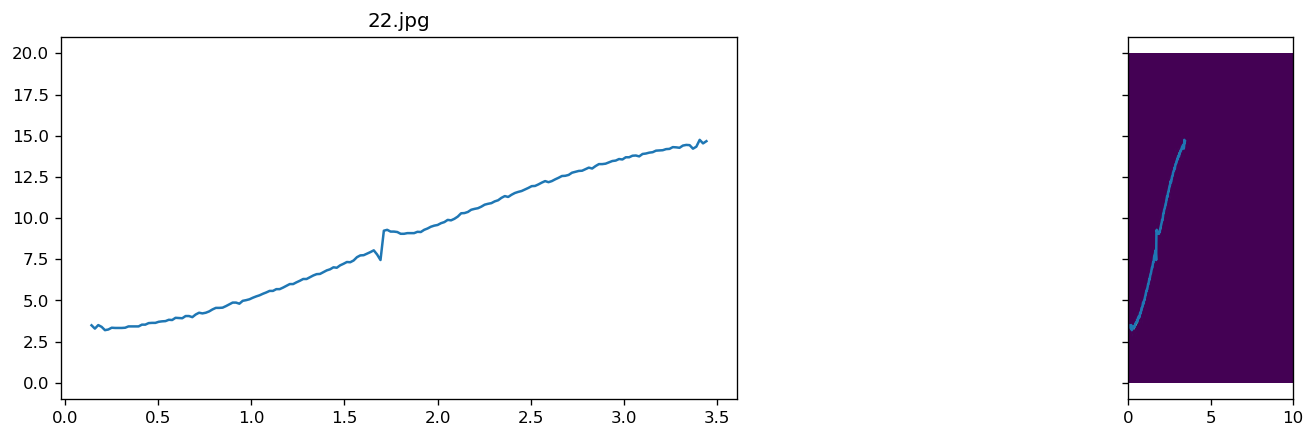

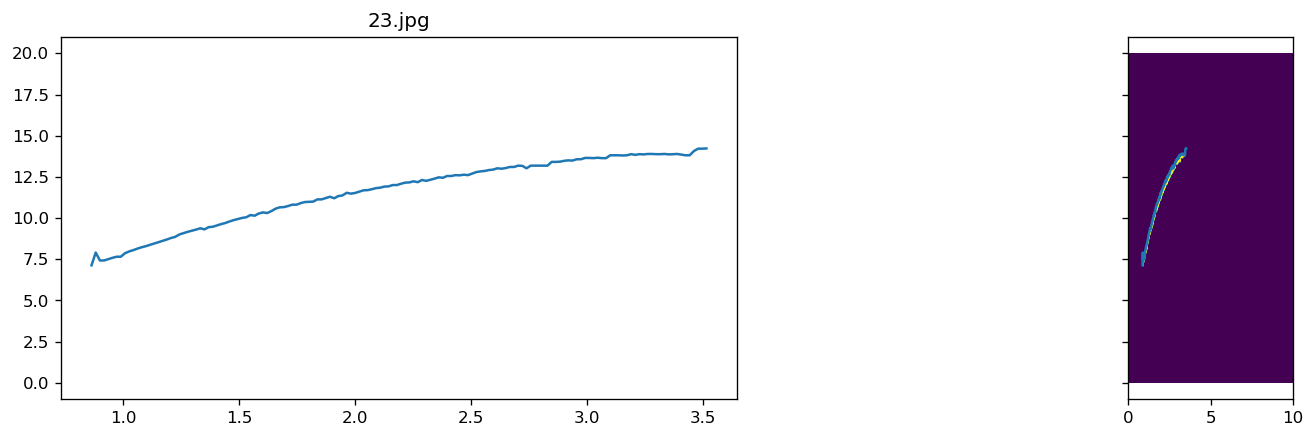

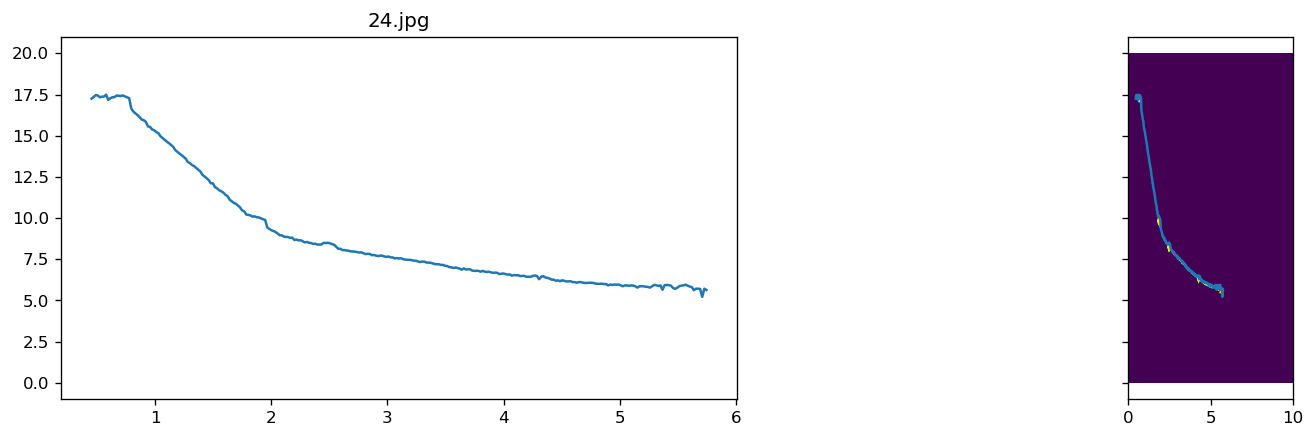

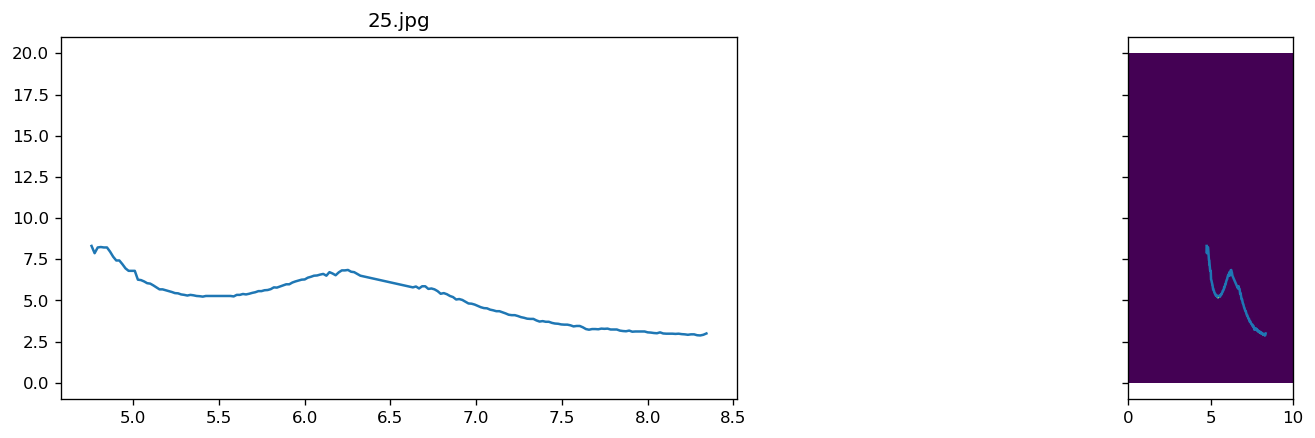

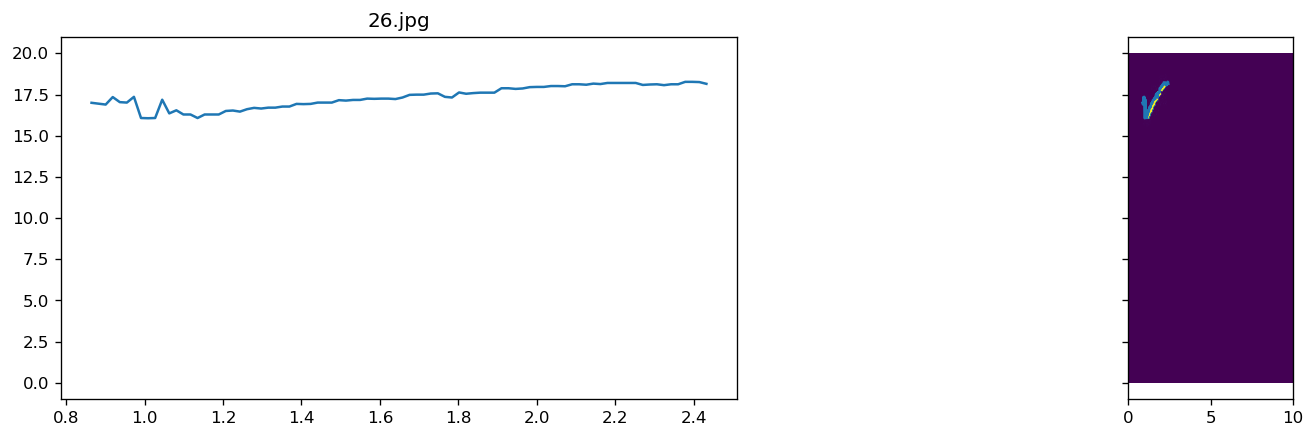

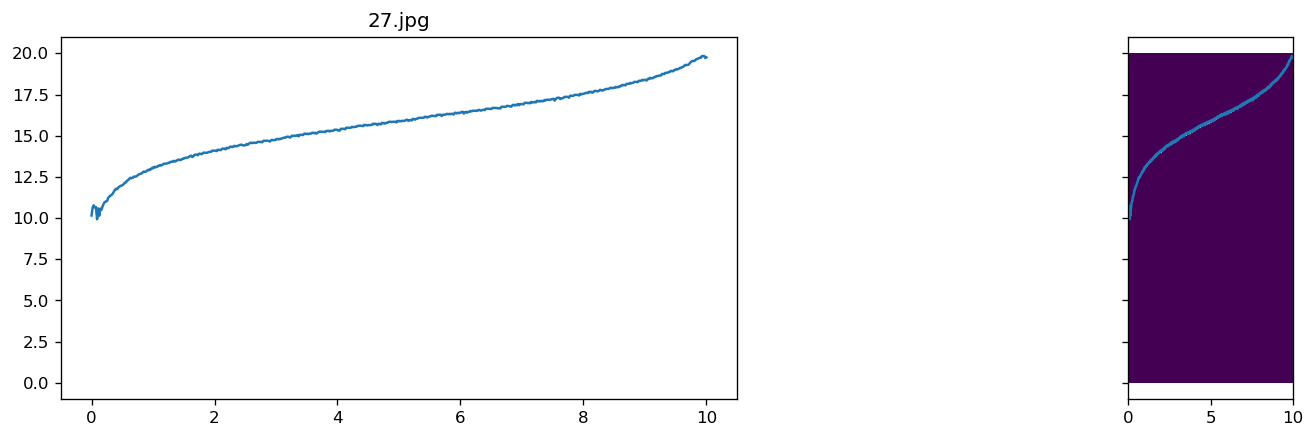

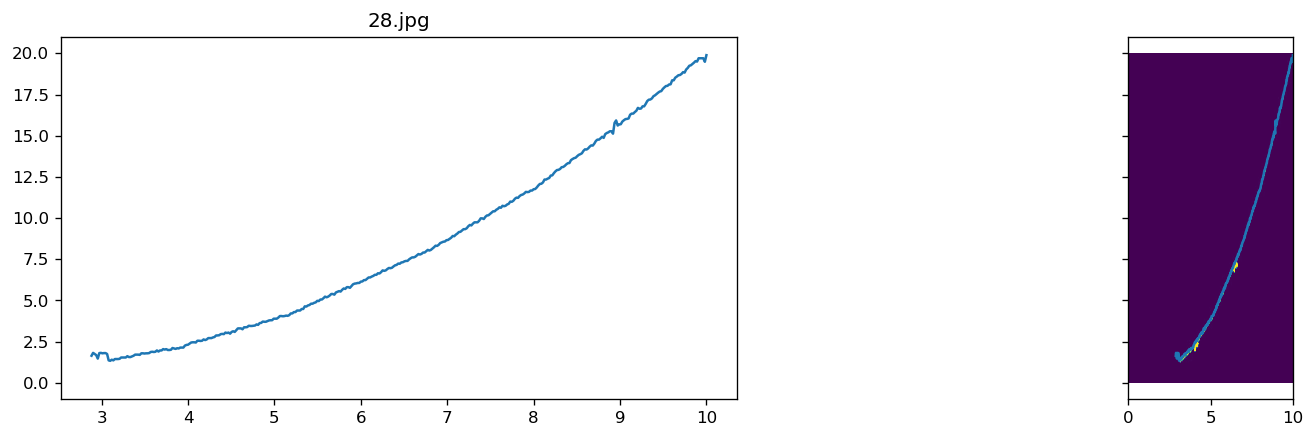

In [30]:
for i in range(1,file_count+1):
    if os.path.exists(final + "{}.jpg".format(i)):
        logging.info(final +'{}.jpg and {}.csv have already exists (overwrite).'.format(i,i))
        graphExtractor('{}.jpg'.format(i),xmin,xmax,ymin,ymax).to_csv(final + '{}.csv'.format(i))
    else:
        graphExtractor('{}.jpg'.format(i),xmin,xmax,ymin,ymax).to_csv(final + '{}.csv'.format(i))
        logging.info(final +'{}.jpg and {}.csv have saved...'.format(i,i))
logging.info('======================Script Completed=================================')#temporary use

## Clean All temporary and output Directories 

In [20]:
import os
import glob

#clean temp1
temp1_files = glob.glob('temp1/*')
for f in temp1_files:
    os.remove(f)
    logging.info('{}.jpg has been removed from temp1 Directory.'.format(f))
    
#clean temp2
temp2_files = glob.glob('temp2/*')
for f in temp2_files:
    os.remove(f)
    logging.info('{}.jpg has been removed from temp2 Directory.'.format(f))
    
#clean temp3
temp3_files = glob.glob('temp3/*')
for f in temp3_files:
    os.remove(f)
    logging.info('{}.jpg has been removed from temp3 Directory.'.format(f))
    
#clean Dataset_out
dataout_files = glob.glob('Dataset_out/*')
for f in dataout_files:
    os.remove(f)
    logging.info('{}.jpg has been removed from Dataset_out Directory.'.format(f))
    
#clean tempGraph
tempgraph_files = glob.glob('tempGraph/*')
for f in tempgraph_files:
    os.remove(f)
    logging.info('{}.jpg has been removed from tempGraph Directory.'.format(f))
    
#clean Final
final_files = glob.glob('Final/*')
for f in final_files:
    os.remove(f)
    logging.info('{}.jpg has been removed from Final Directory.'.format(f))